Using BeautifulSoup, Scrapy and Selenium

In [1]:
# import required libraries

import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

<!DOCTYPE html>

<html data-language="en_US" dir="ltr" lang="en">
<head><title></title><meta content="noindex,nofollow" name="robots"/><meta charset="utf-8"/><meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="yes" name="mobile-web-app-capable"/><meta content="#000000" name="theme-color"/><link href="/favicon.ico" rel="shortcut icon" sizes="16x16 32x32" type="image/x-icon"/><link href="/favicon.ico" rel="icon" sizes="16x16 32x32" type="image/x-icon"/><link href="/favicon.ico" rel="apple-touch-icon"/><link href="/cgp/simple/uitk.styles" media="print" rel="stylesheet" type="text/css"/><link as="script" href="https://c.travel-assets.com/shopping-pwa/l10nBundle/en_US.0568e42153abbf72557d.js" rel="preload"/><link as="script" href="https://c.travel-assets.com/shopping-pwa/app.c888ad466cdaf2294c6d.js" rel="preload"/><link as="script" href="h
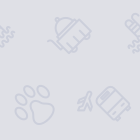

In [2]:
# target URL
url = "https://www.travelocity.com/"

# headers
headers = {
    'User-Agent': "Mozilla/5.0 (X11; Linuz x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"
}

# send request for data
response = requests.request("GET", url, headers=headers)

# parse the downloaded data
data = BeautifulSoup(response.text, 'html.parser')
print(data)

In [3]:
# Parse this HTML data using BeautifulSoup library

# find sections of a given class name:
cards_data = data.find_all('div', attrs={'class', 'width100 fl htlListSeo hotel-tile-srp-container hotel-tile-srp-container-template new-htl-design-tile-main-block'})

# find total number of cards
print('Total Number of Cards =', len(cards_data))

#source code of hotel cards
for card in cards_data:
    print(card)

Total Number of Cards = 0


In [4]:
# from each card extract the Hotel name and price per room
for card in cards_data:
    
    hotel_name = card.find('p') #get hotel name
    room_price = card.find('li', attrs={'class': 'htl-tile-discount-prc'})
    
    print(hotel_name.text, room_price.text)

In [5]:
# store the extracted data as a CSV file

#create a list to store the data
scraped_data = []

for card in cards_data:
    
    # initialize the dictionary
    card_details = {}
    
    #get hotel name
    hotel_name = card.find('p')
    
    #get room price
    room_price = card.find('li', attrs={'class': 'htl-tile-discount-prc'})
    
    # add data to dictionary
    card_details['hotel_name'] = hotel_name.text
    card_details['room_price'] = room_price.text
    
    #append the scraped data to the list
    scraped_data.append(card_details)
    
#create a datafrom from list of dictionaries
df = pd.DataFrame.from_dict(scraped_data)

# save as csv
df.to_csv('hotels_data.csv', index=False)